In [4]:
#naive bayes

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.naive_bayes import GaussianNB


In [44]:
df = pd.read_csv(r'C:\Users\LENOVO\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')
print(df.head())

   region  danceability  energy  key  loudness  mode  speechiness  \
0       3         0.685   0.644   10   -13.206     0       0.1550   
1       3         0.752   0.620    5    -5.536     1       0.0509   
2       1         0.748   0.627    7    -6.029     1       0.0639   
3       2         0.748   0.627    7    -6.029     1       0.0639   
4       3         0.748   0.627    7    -6.029     1       0.0639   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0         0.302          0.000055    0.1140    0.808  164.919       169379   
1         0.309          0.000000    0.0750    0.962  117.399       164459   
2         0.131          0.000000    0.0852    0.524  120.963       188491   
3         0.131          0.000000    0.0852    0.524  120.963       188491   
4         0.131          0.000000    0.0852    0.524  120.963       188491   

   time_signature  popular  
0               4        0  
1               4        0  
2               4        0  


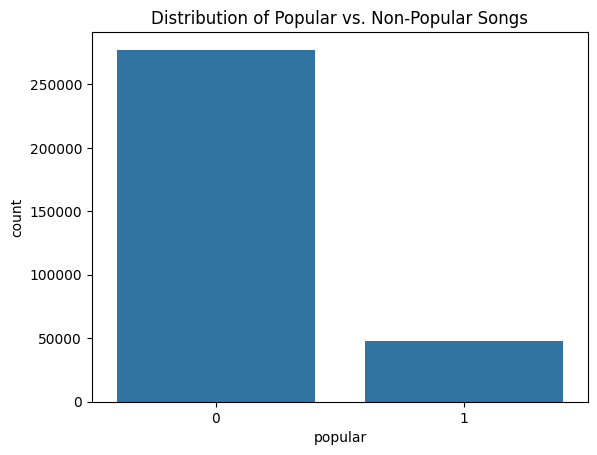

In [45]:

sns.countplot(x='popular', data=df)
plt.title('Distribution of Popular vs. Non-Popular Songs')
plt.show()


In [71]:
#Split the data into features and target variable
X = df.drop(columns=['popular'], axis=1)  # Features
y = df['popular']  # Target variable

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [75]:
nb_model = GaussianNB()

In [76]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [77]:
y_pred = nb_model.predict(X_test)

In [78]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8504


In [79]:
from sklearn.model_selection import cross_val_score, StratifiedKFold 

In [81]:
# Define the number of cross-validation folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Apply cross-validation on the full dataset
cv_scores = cross_val_score(nb_model, X_scaled, y, cv=cv, scoring='accuracy')

# Output cross-validation results
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation accuracy: {cv_scores.mean():.4f}')

Cross-validation scores: [0.8530168  0.85244715 0.85226241 0.85217003 0.85203147]
Average cross-validation accuracy: 0.8524


In [82]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     55340
           1       0.17      0.00      0.01      9613

    accuracy                           0.85     64953
   macro avg       0.51      0.50      0.46     64953
weighted avg       0.75      0.85      0.78     64953



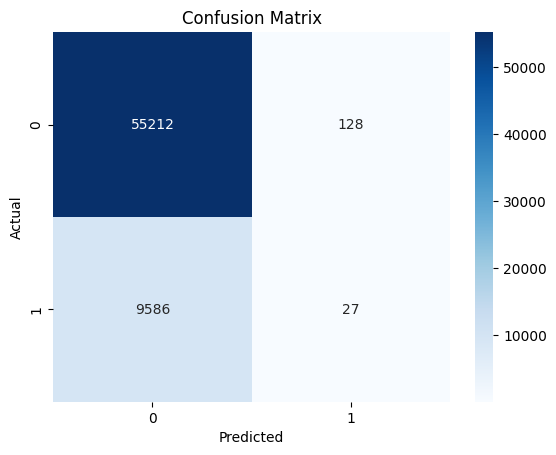

In [83]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

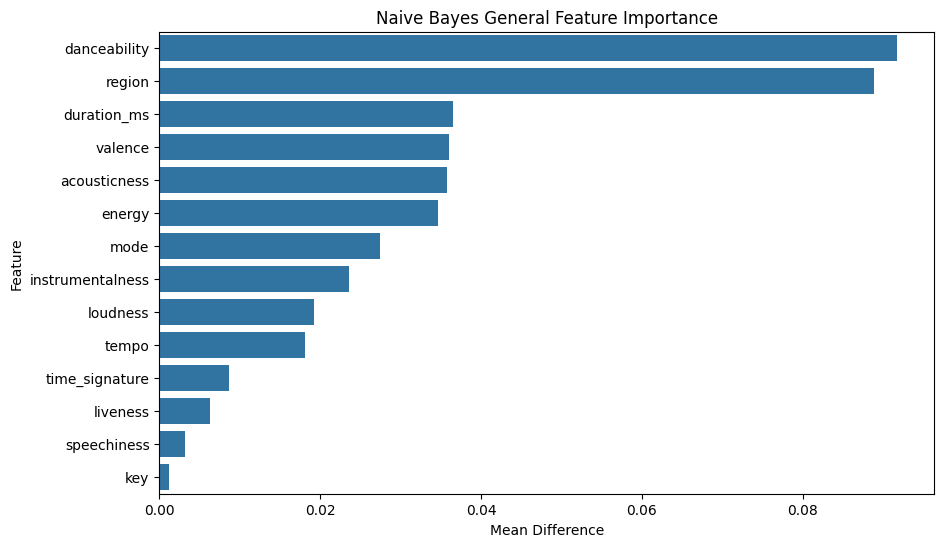

In [84]:
# Scale the features before fitting the model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Naive Bayes model with scaled data
nb_model.fit(X_scaled, y)

# Get the class means (Naive Bayes doesn't have "coefficients")
feature_means = nb_model.theta_

# Calculate the absolute difference between means for each feature between the two classes
feature_importances = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Mean Difference': abs(feature_means[1] - feature_means[0])  # Popular - Non-popular
})

# Sort the feature importance by the absolute difference
feature_importances = feature_importances.sort_values(by='Mean Difference', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean Difference', y='Feature', data=feature_importances)
plt.title('Naive Bayes General Feature Importance')
plt.show()

In [31]:
# Create a dictionary to map region codes to region names
region_names = {
    0: 'Africa',
    1: 'East Asia',
    2: 'Eastern Europe',
    3: 'Latin America',
    4: 'Middle East',
    5: 'North America',
    6: 'Northern Europe',
    7: 'Oceania',
    8: 'South Asia',
    9: 'Southern Europe',
    10: 'Western Europe'
}

# Get the unique regions from your dataset
regions = df['region'].unique()



Analyzing for region: 3


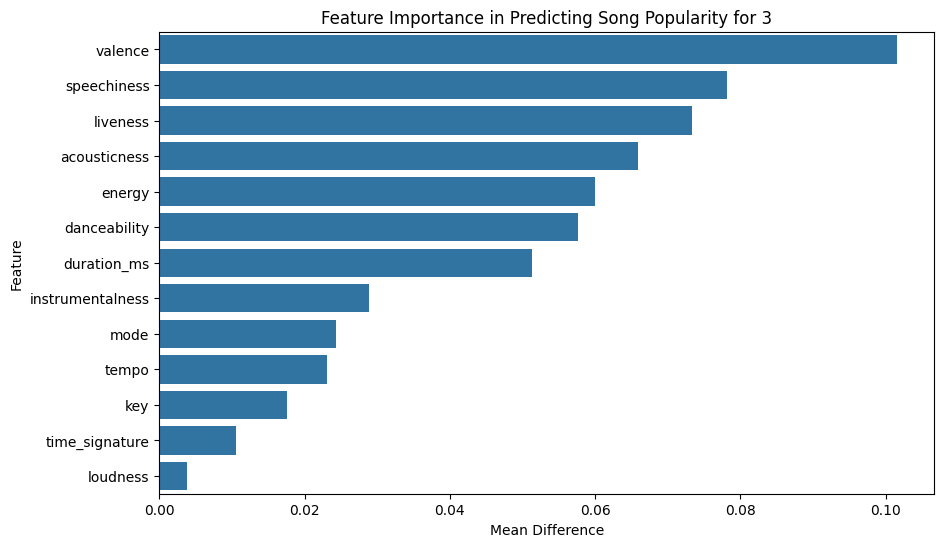


Analyzing for region: 1


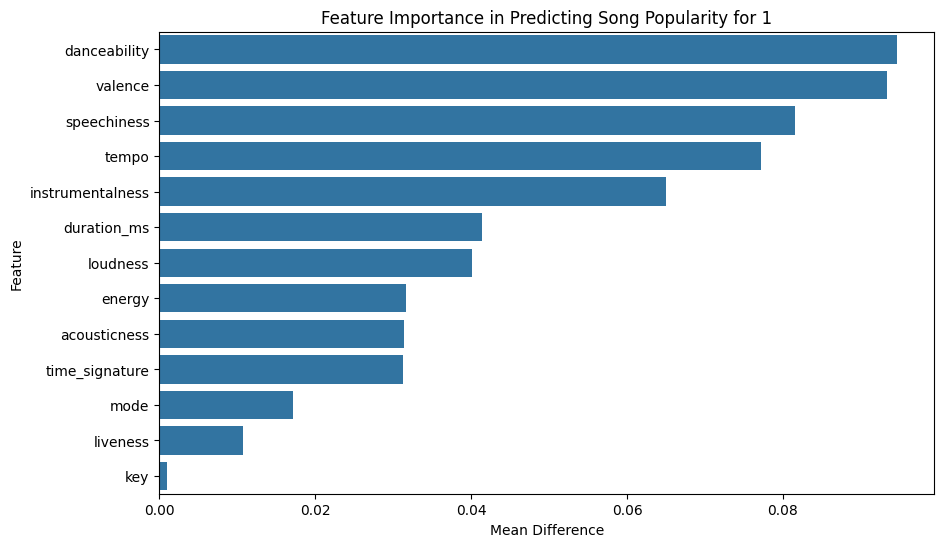


Analyzing for region: 2


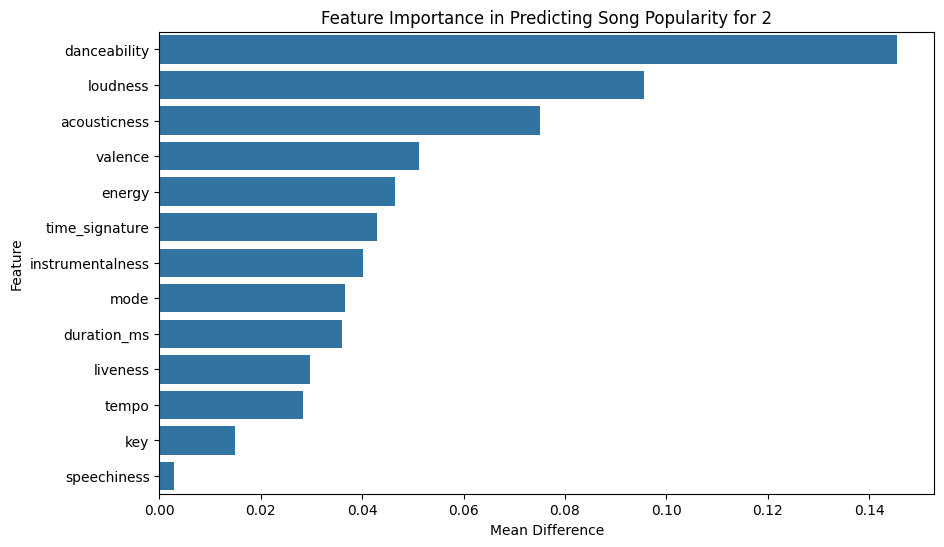


Analyzing for region: 4


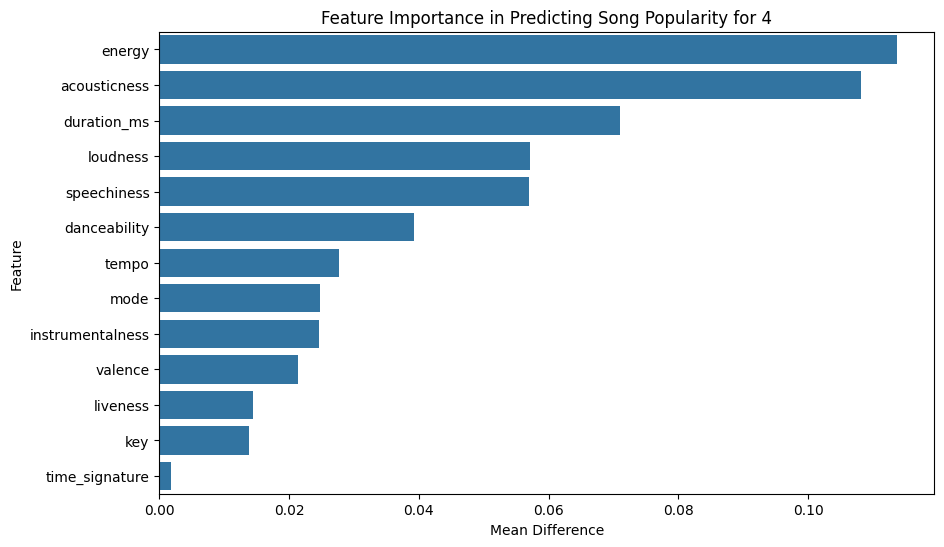


Analyzing for region: 5


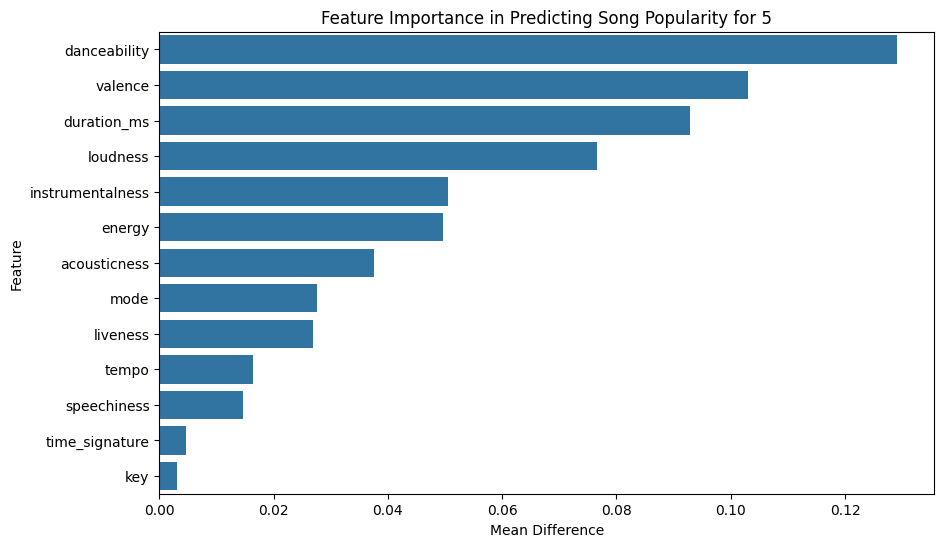


Analyzing for region: 6


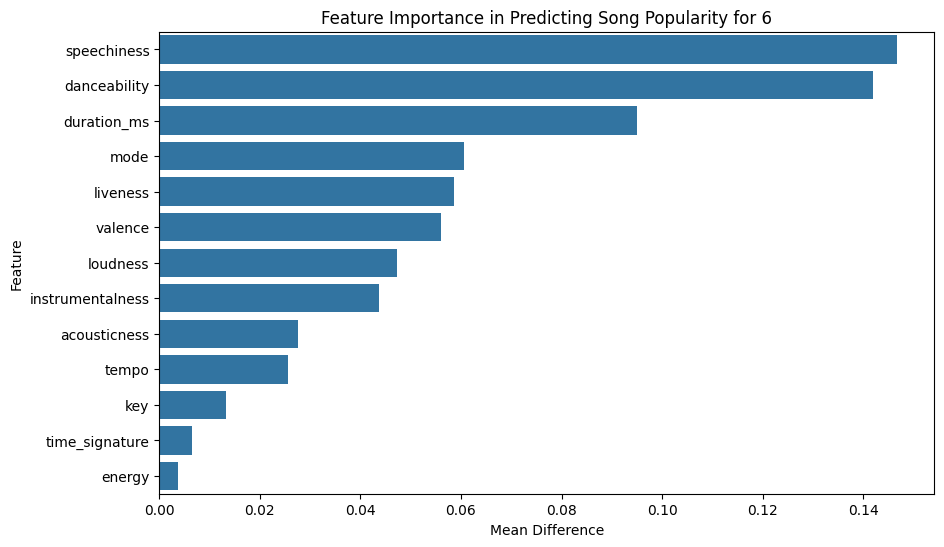


Analyzing for region: 7


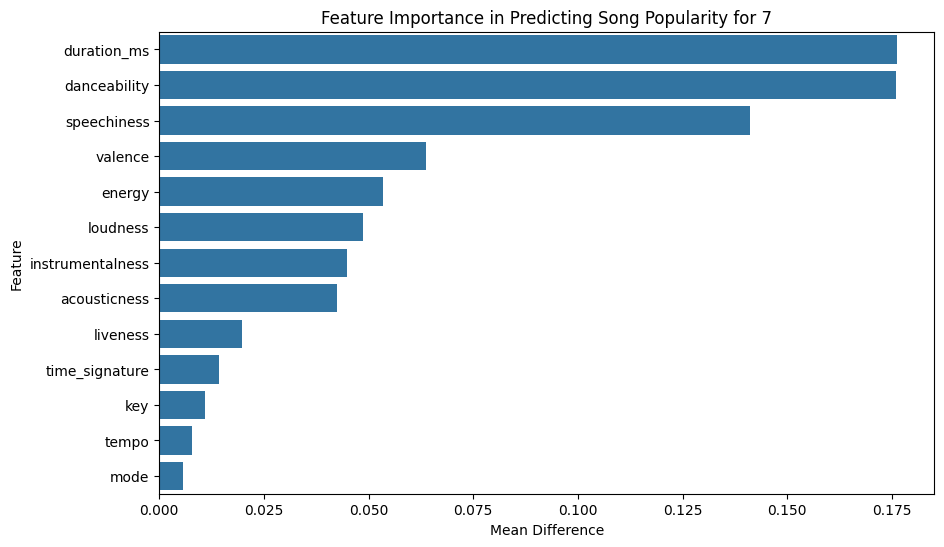


Analyzing for region: 8


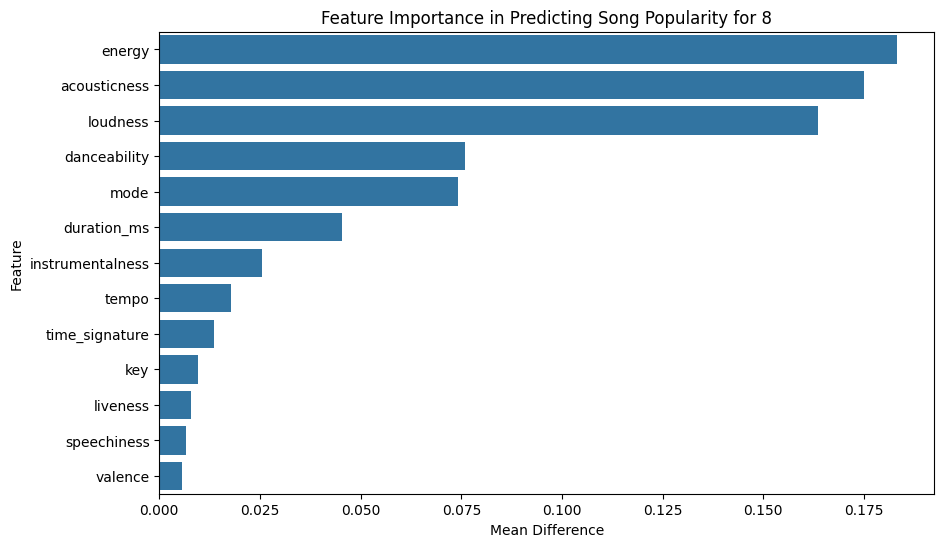


Analyzing for region: 9


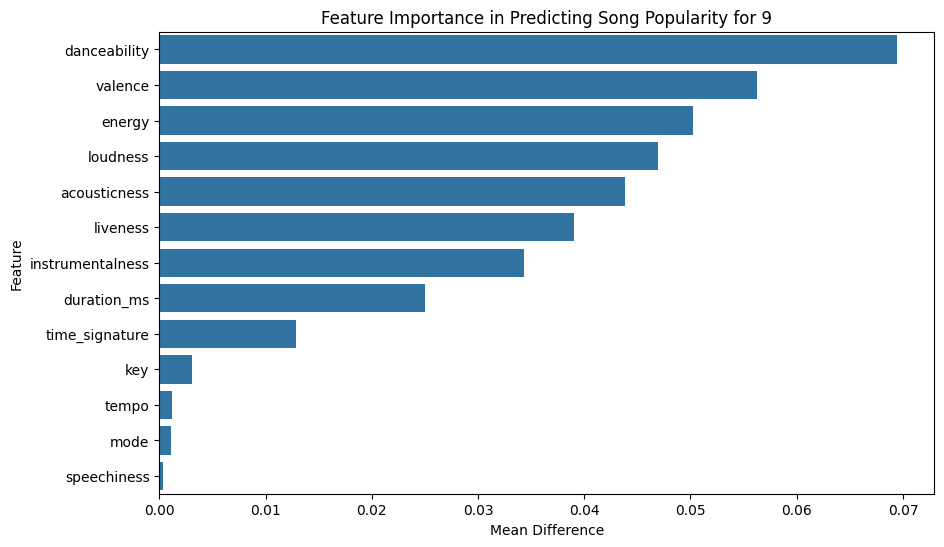


Analyzing for region: 10


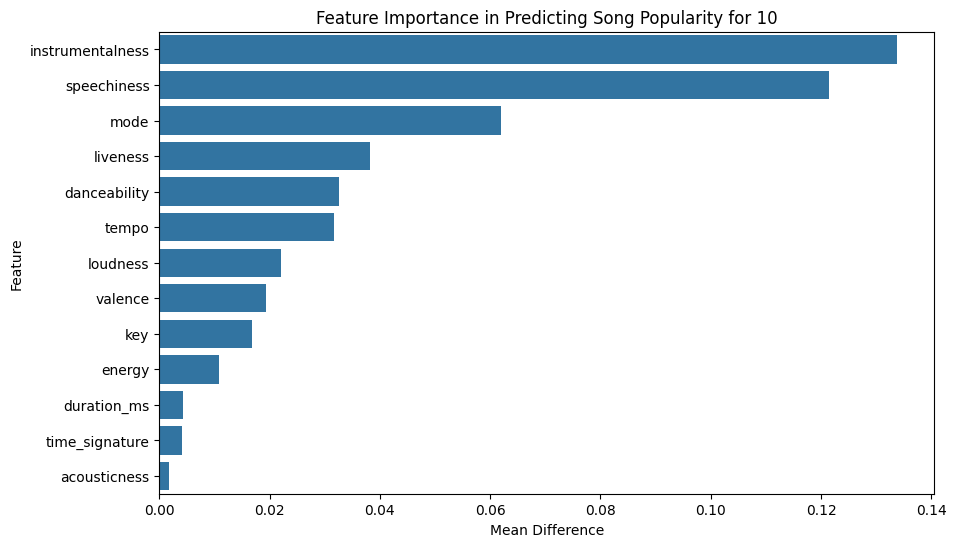


Analyzing for region: 0


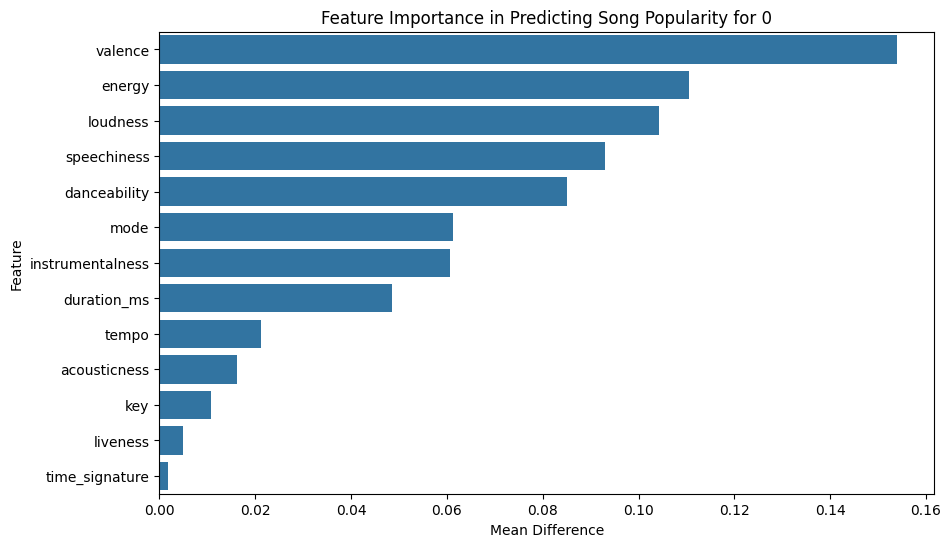

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for region in regions:
    print(f'\nAnalyzing for region: {region}')
    region_data = df[df['region'] == region]
    
    # Split features and target variable
    X_region = region_data.drop(['popular', 'region'], axis=1)
    y_region = region_data['popular']
    
    # Scale the features for this region
    X_region_scaled = scaler.fit_transform(X_region)
    
    # Train Naive Bayes model for this region
    nb_model.fit(X_region_scaled, y_region)
    
    # Analyze feature importance
    feature_means = nb_model.theta_
    feature_importance = pd.DataFrame({
        'Feature': X_region.columns,
        'Mean Difference': abs(feature_means[1] - feature_means[0])
    }).sort_values(by='Mean Difference', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Mean Difference', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance in Predicting Song Popularity for {region}')
    plt.show()


In [88]:
#define a treshold for selecting important features
importance_threshold = 0.1

for region in regions:
    #filter data for the specific region
    region_data = df[df['region'] == region]

    #prepare features and target variable
    X_region = region_data.drop('popular', axis=1)
    y_region = region_data['popular']

    #train a model for this region
    nb_model_region = GaussianNB()
    nb_model_region.fit(X_region, y_region)

    # Get mean values for each feature per class
    class_means = nb_model_region.theta_  # Mean values for each feature in each class

    # Calculate the absolute difference in means between classes (Popular vs. Non-popular)
    mean_differences = abs(class_means[1] - class_means[0])  # Popular - Non-popular

    # Get the important features based on the defined threshold
    important_features_indices = np.where(mean_differences > importance_threshold)[0]
    important_features = X_region.columns[important_features_indices]

    # Calculate and display mean values for important features
    region_name = region_names[region]  # Get the region name from the dictionary
    print(f"\nRegion: {region_name} (Code {region}) - Important Features and Their Mean Values:")

    for feature in important_features:
        mean_value_popular = class_means[1][X_region.columns.get_loc(feature)]  # Mean value for 'Popular'
        mean_value_non_popular = class_means[0][X_region.columns.get_loc(feature)]  # Mean value for 'Non-popular'
        mean_difference = mean_value_popular - mean_value_non_popular  # Difference for context
        print(f"Feature: {feature}, Mean Value (Popular): {mean_value_popular:.2f}, Mean Value (Non-Popular): {mean_value_non_popular:.2f}, Mean Difference: {mean_difference:.2f}")
    



Region: Latin America (Code 3) - Important Features and Their Mean Values:
Feature: tempo, Mean Value (Popular): 122.04, Mean Value (Non-Popular): 122.73, Mean Difference: -0.70
Feature: duration_ms, Mean Value (Popular): 214205.61, Mean Value (Non-Popular): 217784.34, Mean Difference: -3578.73

Region: East Asia (Code 1) - Important Features and Their Mean Values:
Feature: loudness, Mean Value (Popular): -6.74, Mean Value (Non-Popular): -6.88, Mean Difference: 0.14
Feature: tempo, Mean Value (Popular): 123.46, Mean Value (Non-Popular): 121.27, Mean Difference: 2.20
Feature: duration_ms, Mean Value (Popular): 227328.57, Mean Value (Non-Popular): 229870.04, Mean Difference: -2541.48

Region: Eastern Europe (Code 2) - Important Features and Their Mean Values:
Feature: loudness, Mean Value (Popular): -7.08, Mean Value (Non-Popular): -7.40, Mean Difference: 0.32
Feature: tempo, Mean Value (Popular): 122.99, Mean Value (Non-Popular): 122.19, Mean Difference: 0.81
Feature: duration_ms, Mean

In [92]:
# Loop through each region and check the importance of danceability
for region in regions:
    # Filter data for the specific region
    region_data = df[df['region'] == region]
    
    # Prepare features and target
    X_region = region_data.drop('popular', axis=1)  # Features for this region
    y_region = region_data['popular']  # Target (popularity)

    # Train a Naive Bayes model for this region
    nb_model_region = GaussianNB()
    nb_model_region.fit(X_region, y_region)

    # Get mean values for the 'danceability' feature for each class
    loudness_means = nb_model_region.theta_[:, X_region.columns.get_loc('loudness')]

    # Calculate the mean difference
    mean_difference_loudness = abs(loudness_means[1] - loudness_means[0])  # Popular - Non-popular

    # Check if danceability is an important feature based on the mean difference
    if mean_difference_loudness > importance_threshold:
        region_name = region_names.get(region, f"Region {region}")
        print(f"Loudness is an important feature in {region_name}. Mean Difference: {mean_difference_danceability:.2f}")



Loudness is an important feature in East Asia. Mean Difference: 0.34
Loudness is an important feature in Eastern Europe. Mean Difference: 0.34
Loudness is an important feature in Middle East. Mean Difference: 0.34
Loudness is an important feature in North America. Mean Difference: 0.34
Loudness is an important feature in Northern Europe. Mean Difference: 0.34
Loudness is an important feature in Oceania. Mean Difference: 0.34
Loudness is an important feature in South Asia. Mean Difference: 0.34
Loudness is an important feature in Southern Europe. Mean Difference: 0.34
Loudness is an important feature in Africa. Mean Difference: 0.34


In [94]:
# Example new song features
new_song_data = {
    'region': 5,  
    'danceability': 0.7,
    'energy': 0.8,
    'key': 5,               
    'loudness': -5.0,
    'mode': 1,
    'speechiness': 0.05,
    'acousticness': 0.1,
    'instrumentalness': 0.0,
    'liveness': 0.2,
    'valence': 0.6,
    'tempo': 120,
    'duration_ms': 200000,
    'time_signature': 4
}

# Create a DataFrame
new_song_df = pd.DataFrame([new_song_data])

# Prepare the features
X_new_song = new_song_df 

# Scale the new song data using the same scaler
new_song_scaled = scaler.transform(X_new_song)

# Make prediction using the Naive Bayes model
predicted_popularity = nb_model.predict(new_song_scaled)

# Output the prediction
if predicted_popularity[0] == 1:
    print("The new song is predicted to be popular.")
else:
    print("The new song is predicted to be not popular.")


The new song is predicted to be not popular.
